# Importing Libraries and Dataset

In [1]:
from datetime import datetime
import os
from os import listdir
from os.path import isfile, join

import librosa
import librosa.display

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from scipy import signal
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/Users/ad/Downloads/Interview ML'

In [3]:
data =pd.read_excel('/Users/ad/Downloads/Interview ML/Training Data.xlsx')

In [4]:
data2=data

# Making Data fit for Neural Network

In [5]:
data2

,Interviewer Name,Interviwer qualification,Interviwer Experience,Interviewer Age,Interviwer Skills,Interviwer Nationality,Interviewer Location,candidate,candidate qualification,candidate Experience,...,candidate Skills,candidate Nationality,candidate Location,Interview Month,Interview time,Mode,Result,1st Year Performance,Failed Candidate Career Progression,Unnamed: 20
0,I1,B.Tech,5,28,"OIC, OCI",US,Atlanta,C1,BS,5,...,"OIC, OCI",US,Atlanta,January,09:00:00,Video,Pass,Outstanding,NaN,NaN
1,I2,BSc,10,35,HCM Cloud,India,Bangalore,C2,B.Tech,8,...,HCM Cloud,India,Bangalore,February,10:00:00,Video,Fail,NaN,Joined superior competition at higher level,NaN
2,I3,MBA,15,45,ERP Cloud,India,Hyderabad,C3,MBA,13,...,ERP Cloud,India,Hyderabad,February,10:00:00,Video,Pass,Meets Expectations,NaN,NaN
3,I4,MCA,5,30,CX Cloud,US,New York,C4,MS,5,...,CX Cloud,US,New York,March,12:00:00,Face to Face,Fail,NaN,Joined inferior competition at the same/lower ...,NaN
4,I5,Bcom,7,32,SCM Cloud,India,Mumbai,C5,B.Tech,6,...,SCM Cloud,India,Mumbai,March,14:00:00,Video,Fail,NaN,Stayed in current company - promoted,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,I16,B.Tech,10,38,"OIC, OCI",US,Atlanta,C496,MS,7,...,"OIC, OCI",US,Atlanta,November,11:00:00,Video,Pass,Outstanding,NaN,NaN
496,I17,BSc,16,51,HCM Cloud,India,Bangalore,C497,MBA,9,...,HCM Cloud,India,Bangalore,December,11:30:00,Video,Fail,NaN,Joined inferior competition at the same/lower ...,NaN
497,I18,MBA,8,30,ERP Cloud,India,Hyderabad,C498,MCA,14,...,ERP Cloud,India,Hyderabad,December,09:00:00,Face to Face,Pass,Outstanding,NaN,NaN
498,I19,MCA,6,27,CX Cloud,US,New York,C499,MS,12,...,CX Cloud,US,New York,December,15:30:00,Face to Face,Fail,NaN,Joined superior competition at the same/lower ...,NaN


In [6]:
data2 = data2.iloc[: , :-1]
data2 = data2.iloc[: , :-1]
data2 = data2.iloc[: , :-1]

In [7]:
column="Interviwer Experience"
data2[column]=data2[column]/data2[column].abs().max()
column="Interviewer Age"
data2[column]=data2[column]/data2[column].abs().max()
column="candidate Experience"
data2[column]=data2[column]/data2[column].abs().max()
column="candidate Age"
data2[column]=data2[column]/data2[column].abs().max()

In [8]:
one_hot = pd.get_dummies(data2['Interviwer Nationality'])
data2 = data2.drop('Interviwer Nationality',axis = 1)
data2 = data2.join(one_hot)
data2=data2.rename(columns = {'India': 'Indian Interviewer', 'US': 'American Intervierwer'}, inplace = False)
one_hot = pd.get_dummies(data2['candidate Nationality'])
data2 = data2.drop('candidate Nationality',axis = 1)
data2 = data2.join(one_hot)
data2=data2.rename(columns = {'India': 'Indian Candidate', 'US': 'American Candidate'}, inplace = False)
one_hot = pd.get_dummies(data2['Mode'])
data2 = data2.drop('Mode',axis = 1)
data2 = data2.join(one_hot)
data2['Result'].replace({"Pass": 1, "Fail":0}, inplace=True)
data2['Interview Month'].replace({"January": "Q1", "February":"Q1","March":"Q1","April":"Q2","May":"Q2","June":"Q2","July":"Q3","August":"Q3","September":"Q3","October":"Q4","November":"Q4","December":"Q4"}, inplace=True)
one_hot = pd.get_dummies(data2['Interview Month'])
data2 = data2.drop('Interview Month',axis = 1)
data2 = data2.join(one_hot)

In [9]:
data2 = data2.drop('Interviewer Name',axis = 1)
data2 = data2.drop('candidate',axis = 1)
data2 = data2.drop('Interviewer Location',axis = 1)
data2 = data2.drop('candidate Location',axis = 1)

In [10]:
data2['Interviwer  qualification'].replace({"BSc": 0.2, "Bcom": 0.4,"MCA":0.6,'B.Tech':0.8,"MBA":1}, inplace=True)
data2['candidate  qualification'].replace({"BS": 0.2, "MCA": 0.4,"B.Tech":0.6,'MS':0.8,"MBA":1}, inplace=True)

In [11]:
one_hot = pd.get_dummies(data2['Interviwer Skills'])
data2 = data2.drop('Interviwer Skills',axis = 1)
data2 = data2.join(one_hot)
data2=data2.rename(columns = {'CX Cloud': 'CX Cloud(I)', 'ERP Cloud': 'ERP Cloud(I)','HCM Cloud':'HCM Cloud(I)','OIC, OCI':'OIC, OCI(I)','SCM Cloud':'SCM Cloud(I)'}, inplace = False)
one_hot = pd.get_dummies(data2['candidate Skills'])
data2 = data2.drop('candidate Skills',axis = 1)
data2 = data2.join(one_hot)
data2=data2.rename(columns = {'CX Cloud': 'CX Cloud(C)', 'ERP Cloud': 'ERP Cloud(C)','HCM Cloud':'HCM Cloud(C)','OIC, OCI':'OIC, OCI(C)','SCM Cloud':'SCM Cloud(C)'}, inplace = False)

In [12]:
time_list=data2["Interview time"].tolist()
l=[]
for item in time_list:
    l.append(str(item))
data2['Interview time']=l
data2['Interview time'].replace({'08:00:00':'Morning', '09:00:00':'Morning', '10:00:00':'Morning', '10:30:00':'Morning', '11:00:00':'Morning','11:30:00':'Morning', '12:00:00':'Morning', '12:30:00':'Afternoon', '13:00:00':'Afternoon', '13:30:00':'Afternoon','14:00:00':'Afternoon', '14:30:00':'Afternoon', '15:00:00':'Afternoon', '15:30:00':'Afternoon', '16:00:00':'Afternoon','17:00:00':'Evening', '17:30:00':'Evening', '18:00:00':'Evening', '19:00:00':'Evening', '20:00:00':'Evening','21:00:00':'Evening'}, inplace=True)
one_hot = pd.get_dummies(data2['Interview time'])
data2 = data2.drop('Interview time',axis = 1)
data2 = data2.join(one_hot)

In [13]:
data2

,Interviwer qualification,Interviwer Experience,Interviewer Age,candidate qualification,candidate Experience,candidate Age,Result,Indian Interviewer,American Intervierwer,Indian Candidate,...,"OIC, OCI(I)",SCM Cloud(I),CX Cloud(C),ERP Cloud(C),HCM Cloud(C),"OIC, OCI(C)",SCM Cloud(C),Afternoon,Evening,Morning
0,0.8,0.277778,0.549020,0.2,0.357143,0.604651,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,0.2,0.555556,0.686275,0.6,0.571429,0.767442,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1.0,0.833333,0.882353,1.0,0.928571,0.976744,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0.6,0.277778,0.588235,0.8,0.357143,0.674419,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0.4,0.388889,0.627451,0.6,0.428571,0.720930,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.8,0.555556,0.745098,0.8,0.500000,0.767442,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
496,0.2,0.888889,1.000000,1.0,0.642857,0.720930,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
497,1.0,0.444444,0.588235,0.4,1.000000,0.813953,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
498,0.6,0.333333,0.529412,0.8,0.857143,0.744186,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


# Test train Split

In [14]:
target=data2['Result']
data2 = data2.drop('Result',axis = 1)
x_train, x_test, y_train, y_test = train_test_split(data2, target,test_size=0.2, random_state = 42)

In [26]:
model= Sequential()
model.add(Dense(128,input_shape=(29,)))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [28]:
model.summary()

score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               3840      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5335
Pre-training accuracy: 55.0

In [31]:
num_epochs = 500
num_batch_size = 1
start = datetime.now()

history=model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs,validation_data=(x_test, y_test),  verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
400/400 [==============================] - 0s 970us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 2/500
400/400 [==============================] - 0s 839us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 3/500
400/400 [==============================] - 0s 857us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 4/500
400/400 [==============================] - 0s 888us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 5/500
400/400 [==============================] - 0s 908us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 6/500
400/400 [==============================] - 0s 928us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 7/500
400/400 [==============================] - 0s 843us/step - loss: 0.000

400/400 [==============================] - 0s 833us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 55/500
400/400 [==============================] - 0s 835us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 56/500
400/400 [==============================] - 0s 822us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 57/500
400/400 [==============================] - 0s 822us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 58/500
400/400 [==============================] - 0s 842us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 59/500
400/400 [==============================] - 0s 823us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 60/500
400/400 [==============================] - 0s 831us/step - loss: 0.0000e+00 

400/400 [==============================] - 0s 850us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 108/500
400/400 [==============================] - 0s 836us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 109/500
400/400 [==============================] - 0s 835us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 110/500
400/400 [==============================] - 0s 849us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 111/500
400/400 [==============================] - 0s 839us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 112/500
400/400 [==============================] - 0s 892us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 113/500
400/400 [==============================] - 0s 857us/step - loss: 0.000

Epoch 160/500
400/400 [==============================] - 0s 837us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 161/500
400/400 [==============================] - 0s 829us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 162/500
400/400 [==============================] - 0s 824us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 163/500
400/400 [==============================] - 0s 822us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 164/500
400/400 [==============================] - 0s 828us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 165/500
400/400 [==============================] - 0s 821us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 166/500
400/400 [==============================] - 0s 832us/step

Epoch 213/500
400/400 [==============================] - 0s 832us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 214/500
400/400 [==============================] - 0s 836us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 215/500
400/400 [==============================] - 0s 872us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 216/500
400/400 [==============================] - 0s 941us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 217/500
400/400 [==============================] - 0s 838us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 218/500
400/400 [==============================] - 0s 855us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 219/500
400/400 [==============================] - 0s 900us/step

Epoch 266/500
400/400 [==============================] - 0s 839us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 267/500
400/400 [==============================] - 0s 897us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 268/500
400/400 [==============================] - 0s 831us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 269/500
400/400 [==============================] - 0s 839us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 270/500
400/400 [==============================] - 0s 828us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 271/500
400/400 [==============================] - 0s 830us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 272/500
400/400 [==============================] - 0s 825us/step

Epoch 319/500
400/400 [==============================] - 0s 835us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 320/500
400/400 [==============================] - 0s 827us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 321/500
400/400 [==============================] - 0s 827us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 322/500
400/400 [==============================] - 0s 825us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 323/500
400/400 [==============================] - 0s 835us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 324/500
400/400 [==============================] - 0s 841us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 325/500
400/400 [==============================] - 0s 837us/step

Epoch 372/500
400/400 [==============================] - 0s 835us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 373/500
400/400 [==============================] - 0s 835us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 374/500
400/400 [==============================] - 0s 828us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 375/500
400/400 [==============================] - 0s 827us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 376/500
400/400 [==============================] - 0s 831us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 377/500
400/400 [==============================] - 0s 828us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 378/500
400/400 [==============================] - 0s 845us/step

Epoch 425/500
400/400 [==============================] - 0s 832us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 426/500
400/400 [==============================] - 0s 832us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 427/500
400/400 [==============================] - 0s 828us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 428/500
400/400 [==============================] - 0s 830us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 429/500
400/400 [==============================] - 0s 826us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 430/500
400/400 [==============================] - 0s 825us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 431/500
400/400 [==============================] - 0s 826us/step

Epoch 478/500
400/400 [==============================] - 0s 927us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 479/500
400/400 [==============================] - 0s 894us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 480/500
400/400 [==============================] - 0s 851us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 481/500
400/400 [==============================] - 0s 875us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 482/500
400/400 [==============================] - 0s 838us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 483/500
400/400 [==============================] - 0s 854us/step - loss: 0.0000e+00 - accuracy: 0.5675 - val_loss: 0.0000e+00 - val_accuracy: 0.5700
Epoch 484/500
400/400 [==============================] - 0s 844us/step

In [32]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.5674999952316284
Testing Accuracy:  0.5699999928474426


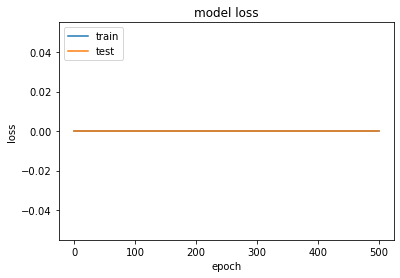

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

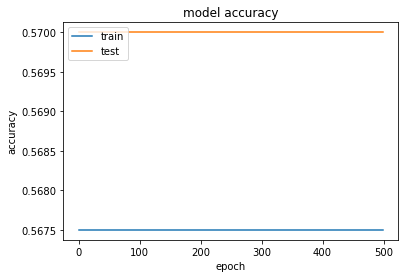

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()